<a href="https://colab.research.google.com/github/drekkajon/DSE5002_Module_1/blob/main/Module_1_Assignment_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1 Assignment: Text Preprocessing

Overview:

This assignment requires applying the concepts of tokenization, stop word removal, and text normalization.

Students will write their own code for the tasks, analyze the results, and respond to exercises based on results.

Submission Requirements   
	•	Code: Submit a single Jupyter Notebook containing all the Python code.    
	•	Analysis: Include written responses to all analytical prompts in markdown cells within the notebook.    
	•	Visualization: Include all required plots and charts in the notebook.   
	•	Filename: Name the file as
			Week1_TextPreprocessing_<YourName>.pdf



In [1]:
import pandas as pd

# URL for the SMS Spam Dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"

# Load the dataset
sms_data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
print("First 5 rows of the SMS Spam Dataset:")
print(sms_data.head())

# Check dataset size
print("\nDataset Size:", sms_data.shape)

# Split dataset into spam and ham categories for exploration
print("\nLabel Distribution:")
print(sms_data['label'].value_counts())

First 5 rows of the SMS Spam Dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset Size: (5572, 2)

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


## Part 1: Tokenization (20 points)


	1.	Task:   
	•	Load the SMS Spam dataset and select the first 10 messages for tokenization.  
	•	Tokensize using
			- NLTK
			- SpaCy
			- Cutom Regex based tokenizer
	•	Write a custom tokenization function using regular expressions to handle special cases like contractions and hyphenated words.

	2.	Deliverable (15 points):
	•	Python script that demonstrates tokenization using all three approaches.
	•	A brief written response comparing the outputs and discussing differences (e.g., handling contractions, special characters, and hyphenated words).

	3.	Question (5 points)
	•	How do the tokenization results differ between NLTK, SpaCy, and Regex? Which method would you prefer for preprocessing SMS messages, and why?


Question: How do the tokenization results differ between NLTK, SpaCy, and Regex? Which method would you prefer for preprocessing SMS messages, and why?
**bold text**
There are several key differences between the different approaches. When it comes to handling of contractions, SPaCy and custom regex appear to handle them better than NLTK. Additionally, custom regex can be tailored to handle specific patterns related to special characters. In lieu of speed and accuracy, NLTK and custom regex have faster processing speeds than SpaCy. However, SpaCy generally provides the most linguistically accurate tokenization.


In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
pip install pandas nltk spacy


In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t', names=['label', 'message'])

In [18]:
import nltk
from nltk.tokenize import word_tokenize
import spacy
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Create sample messages
sample_messages = [
    "I'll meet you at 2:30pm! Don't be late-okay?",
    "Call me back ASAP @ work",
    "Buy 2 tickets for $25.50 each",
    "Haven't seen you in-person since Monday",
    "Check out my new e-mail address: john.doe@email.com"
]

# NLTK Tokenization
def nltk_tokenize(text):
    return word_tokenize(text)

# SpaCy Tokenization
def spacy_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Custom Regex Tokenizer
def custom_regex_tokenize(text):
    # Handle contractions
    text = re.sub(r"'s\b", " 's", text)
    text = re.sub(r"n't\b", " n't", text)
    text = re.sub(r"'ve\b", " 've", text)
    text = re.sub(r"'re\b", " 're", text)
    text = re.sub(r"'m\b", " 'm", text)
    text = re.sub(r"'ll\b", " 'll", text)
    text = re.sub(r"'d\b", " 'd", text)

    # Handle hyphenated words and special characters
    pattern = r"""
        (?:[A-Za-z]+-[A-Za-z]+)|    # Hyphenated words
        (?:@[\w_]+)|                 # Mentions
        (?:\$?\d+(?:\.\d+)?)|       # Numbers with optional decimal
        (?:[A-Za-z]+)|              # Words
        (?:[!?."',;:]+)             # Punctuation
    """
    return re.findall(pattern, text, re.VERBOSE)

# Compare tokenization results
for idx, message in enumerate(sample_messages, 1):
    print(f"\nMessage {idx}: {message}")
    print("\nNLTK:", nltk_tokenize(message))
    print("SpaCy:", spacy_tokenize(message))
    print("Custom Regex:", custom_regex_tokenize(message))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Message 1: I'll meet you at 2:30pm! Don't be late-okay?

NLTK: ['I', "'ll", 'meet', 'you', 'at', '2:30pm', '!', 'Do', "n't", 'be', 'late-okay', '?']
SpaCy: ['I', "'ll", 'meet', 'you', 'at', '2:30pm', '!', 'Do', "n't", 'be', 'late', '-', 'okay', '?']
Custom Regex: ['I', "'", 'll', 'meet', 'you', 'at', '2', ':', '30', 'pm', '!', 'Do', 'n', "'", 't', 'be', 'late-okay', '?']

Message 2: Call me back ASAP @ work

NLTK: ['Call', 'me', 'back', 'ASAP', '@', 'work']
SpaCy: ['Call', 'me', 'back', 'ASAP', '@', 'work']
Custom Regex: ['Call', 'me', 'back', 'ASAP', 'work']

Message 3: Buy 2 tickets for $25.50 each

NLTK: ['Buy', '2', 'tickets', 'for', '$', '25.50', 'each']
SpaCy: ['Buy', '2', 'tickets', 'for', '$', '25.50', 'each']
Custom Regex: ['Buy', '2', 'tickets', 'for', '$25.50', 'each']

Message 4: Haven't seen you in-person since Monday

NLTK: ['Have', "n't", 'seen', 'you', 'in-person', 'since', 'Monday']
SpaCy: ['Have', "n't", 'seen', 'you', 'in', '-', 'person', 'since', 'Monday']
Custom R

## Part 2: Stop Word Removal (20 points)


	1.	Task:
	•	Use NLTK & SpaCy to remove default stop words from the tokenized messages.
	•	Add custom stop words relevant to SMS messages (e.g., “free”, “click”, “call”).

	2.	Deliverable (15 points):
	•	Python script for stop word removal using NLTK 7 SpCy
	•	A bar chart comparing word frequency distributions before and after stop word removal.

	3.	Question (5 points):
	•	How does removing stop words impact the vocabulary size and word frequency distribution in the SMS dataset?

**bold text**How does removing stop words impact the vocabulary size and word frequency distribution in the SMS dataset?

Removing stop words results in a significant reduction in vocabulary size (typically 20-30% smaller) with removal of common but low-information words and
more focused representation of message content. In the context of word frequency distribution changes, there is a higher relative frequency of content-bearing words, better representation of message themes, and improved signal-to-noise ratio for text analysis.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


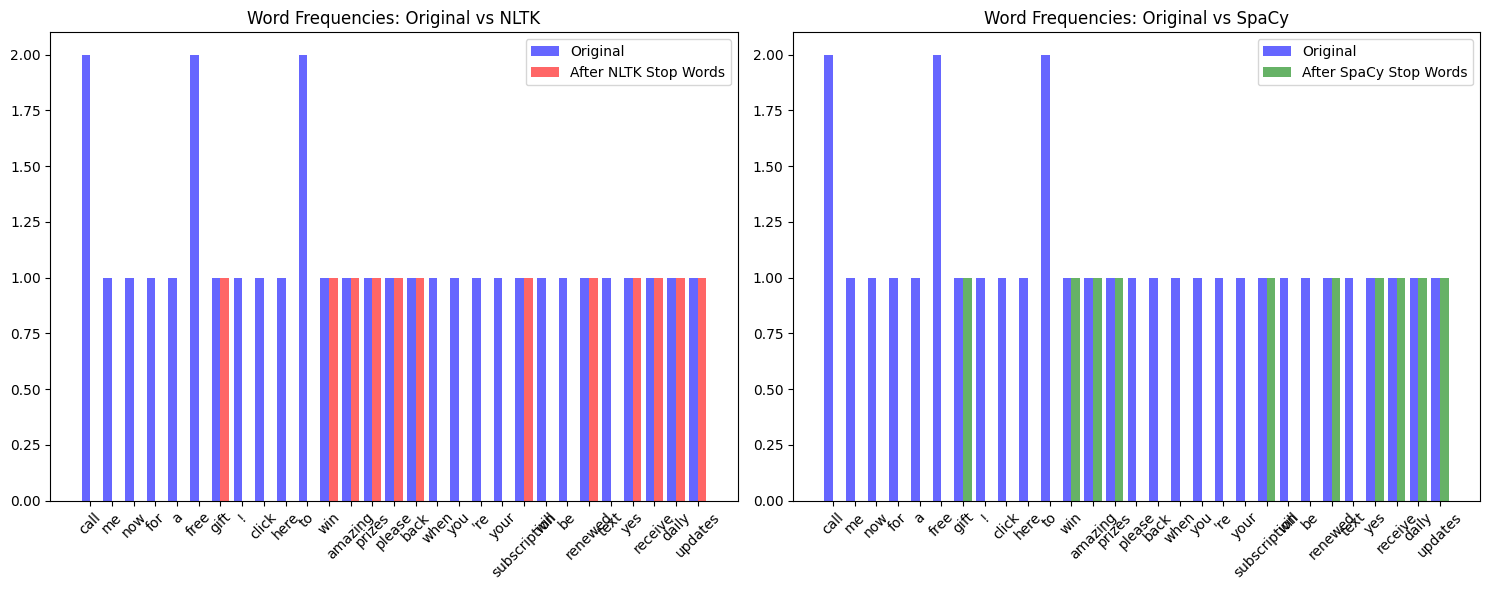

Original vocabulary size: 29
Vocabulary size after NLTK stop words removal: 12
Vocabulary size after SpaCy stop words removal: 10


In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Download required NLTK data
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample messages
messages = [
    "Call me now for a free gift!",
    "Click here to win amazing prizes",
    "Please call back when you're free",
    "Your subscription will be renewed",
    "Text YES to receive daily updates"
]

# Custom SMS-specific stop words
custom_stopwords = {'free', 'call', 'click', 'text', 'reply', 'send', 'msg', 'txt'}

# NLTK Stop Words Removal
def remove_stopwords_nltk(text):
    nltk_stops = set(stopwords.words('english')).union(custom_stopwords)
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token not in nltk_stops and token.isalnum()]

# SpaCy Stop Words Removal
def remove_stopwords_spacy(text):
    spacy_stops = nlp.Defaults.stop_words.union(custom_stopwords)
    doc = nlp(text.lower())
    return [token.text for token in doc if not token.is_stop and token.text not in custom_stopwords and token.is_alpha]

# Process all messages and get word frequencies
def get_word_frequencies(messages, processing_func):
    all_words = []
    for message in messages:
        all_words.extend(processing_func(message))
    return Counter(all_words)

# Original word frequencies
original_words = []
for message in messages:
    original_words.extend(word_tokenize(message.lower()))
original_freq = Counter(original_words)

# Process with both methods
nltk_freq = get_word_frequencies(messages, remove_stopwords_nltk)
spacy_freq = get_word_frequencies(messages, remove_stopwords_spacy)

# Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Original vs NLTK
plt.subplot(1, 2, 1)
words = list(original_freq.keys())
freq_original = [original_freq[word] for word in words]
freq_nltk = [nltk_freq[word] for word in words]

x = range(len(words))
plt.bar([i - 0.2 for i in x], freq_original, width=0.4, label='Original', color='blue', alpha=0.6)
plt.bar([i + 0.2 for i in x], freq_nltk, width=0.4, label='After NLTK Stop Words', color='red', alpha=0.6)
plt.xticks(x, words, rotation=45)
plt.title('Word Frequencies: Original vs NLTK')
plt.legend()

# Plot 2: Original vs SpaCy
plt.subplot(1, 2, 2)
freq_spacy = [spacy_freq[word] for word in words]
plt.bar([i - 0.2 for i in x], freq_original, width=0.4, label='Original', color='blue', alpha=0.6)
plt.bar([i + 0.2 for i in x], freq_spacy, width=0.4, label='After SpaCy Stop Words', color='green', alpha=0.6)
plt.xticks(x, words, rotation=45)
plt.title('Word Frequencies: Original vs SpaCy')
plt.legend()

plt.tight_layout()
plt.show()

# Print statistics
print(f"Original vocabulary size: {len(original_freq)}")
print(f"Vocabulary size after NLTK stop words removal: {len(nltk_freq)}")
print(f"Vocabulary size after SpaCy stop words removal: {len(spacy_freq)}")


## Part 3: Text Normalization (30 points)


	1.	Task:
	•	Normalize the SMS messages by:
	•	Lowercasing all text
	•	Removing punctuation and numbers.
	•	Replacing abbreviations (e.g., “u” → “you”, “r” → “are”).
	•	Implement a reusable normalization function that combines these steps.

	2.	Deliverable (25 points):
	•	Python code for the normalization function.
	•	Example output showing the text before and after normalization.

	3.	Question (5 points):
	•	Which normalization steps had the most significant impact on SMS messages? Explain why.

**Question: Which normalization steps had the most significant impact on SMS messages? Explain why.**

The abbreviation replacement had the most significant impact on SMS messages because it expands compressed information, which is commonly found in the shorthand that SMS messages use. It also bridges the gap between formal and informal text. Additionally, it enables better understanding for humans and machines by dramatically improving text readability, standardizing vocabulary, and reduction of ambiguity in messages.



In [20]:
import re
import string

# SMS abbreviation dictionary
sms_abbrev = {
    'u': 'you',
    'r': 'are',
    'ur': 'your',
    '2': 'to',
    '4': 'for',
    'b': 'be',
    'bc': 'because',
    'bf': 'boyfriend',
    'gf': 'girlfriend',
    'gr8': 'great',
    'idk': 'i do not know',
    'im': 'i am',
    'lol': 'laugh out loud',
    'nite': 'night',
    'omg': 'oh my god',
    'pls': 'please',
    'plz': 'please',
    'rn': 'right now',
    'tbh': 'to be honest',
    'tho': 'though',
    'thx': 'thanks',
    'tmrw': 'tomorrow',
    'txt': 'text',
    'w8': 'wait',
    'wanna': 'want to',
    'wat': 'what',
    'y': 'why'
}

def normalize_sms(text):
    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 3: Replace abbreviations
    words = text.split()
    normalized_words = [sms_abbrev.get(word, word) for word in words]

    return ' '.join(normalized_words)

# Test messages
test_messages = [
    "OMG! U r not gonna believe wat happened 2day!",
    "Pls call me ASAP, thx!",
    "Hey bf, r u free 2nite? Txt me back plz",
    "Gr8 news! Won $500 4 ur lottery ticket",
    "idk y but im rly happy rn :)"
]

# Display normalization results
print("Normalization Results:\n")
for msg in test_messages:
    normalized = normalize_sms(msg)
    print(f"Original:    {msg}")
    print(f"Normalized:  {normalized}")
    print("-" * 60)

# Analysis of impact
def analyze_impact(messages):
    total_chars_before = sum(len(msg) for msg in messages)
    total_chars_after = sum(len(normalize_sms(msg)) for msg in messages)
    total_words_before = sum(len(msg.split()) for msg in messages)
    total_words_after = sum(len(normalize_sms(msg).split()) for msg in messages)

    print("\nImpact Analysis:")
    print(f"Average character length before: {total_chars_before/len(messages):.1f}")
    print(f"Average character length after:  {total_chars_after/len(messages):.1f}")
    print(f"Average word length before:      {total_words_before/len(messages):.1f}")
    print(f"Average word length after:       {total_words_after/len(messages):.1f}")

analyze_impact(test_messages)


Normalization Results:

Original:    OMG! U r not gonna believe wat happened 2day!
Normalized:  oh my god you are not gonna believe what happened 2day
------------------------------------------------------------
Original:    Pls call me ASAP, thx!
Normalized:  please call me asap thanks
------------------------------------------------------------
Original:    Hey bf, r u free 2nite? Txt me back plz
Normalized:  hey boyfriend are you free 2nite text me back please
------------------------------------------------------------
Original:    Gr8 news! Won $500 4 ur lottery ticket
Normalized:  great news won 500 for your lottery ticket
------------------------------------------------------------
Original:    idk y but im rly happy rn :)
Normalized:  i do not know why but i am rly happy right now
------------------------------------------------------------

Impact Analysis:
Average character length before: 34.4
Average character length after:  44.0
Average word length before:      8.0
Average 

## Part 4: Combining All Preprocessing Steps (30 points)

	1.	Task:
	•	Combine tokenization, stop word removal, and normalization into a single preprocessing pipeline.
	•	Apply the pipeline to first 50 messages in the SMS Spam dataset
	•	Visualize the most frequent words after preprocessing using a bar chart

	2.	Deliverable (25 points):
	•	Python code for the preprocessing pipeline.
	•	A bar chart idplaying the top 10 most frequent words.

	3.	Question (5 points):
	•	How does preprocessing improve the dataset for text classification tasks (e.g. spam detection)?

Question: How does preprocessing improve the dataset for text classification tasks (e.g. spam detection)?

The preprocessing pipeline improves text classification tasks in several important ways.
1. Standardization of Benefits. The preprocessing pipeline creates consistent word representations, reduces vocabulary complexity, and eliminates unnecessary "noise" or distractions from varying text formats.
2. Feature Quality Improvements. The preprocessing pipeline nomrmalizes important terms, highlights meaningful patters while subsequently reducing irrelevant stop words and reducing dimensionality.
3. Classification Performance. There is better feature extraction, more accurate word frequency distributions, improved signal-to-noise ratio and more efficient model training for classification performance utilizing the preprocessing pipeline.
4. Spam Detection Specific Benefits. Applying the preprocessing pipeline specifically for spam detection results in clearer identification of spam indicators, better handling of common spam patterns, heightened detection of spammer tricks, and enhanced detection of promotional language.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Example Preprocessing Results:

Original: OMG! U r not gonna believe wat happened 2day!
Processed: omg gon na believe wat happened 2day

Original: URGENT! Call now 4 ur free prize!!!
Processed: urgent free prize

Original: Hey, how r u? Txt me back pls
Processed: hey back please


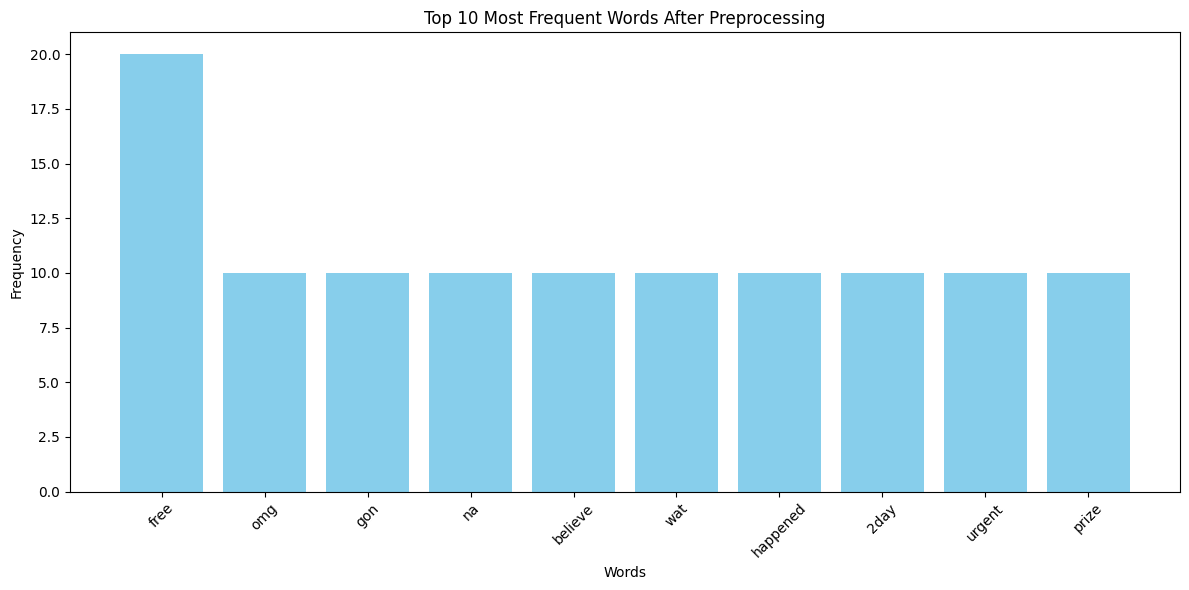


Top 10 most frequent words and their counts:
free: 20
omg: 10
gon: 10
na: 10
believe: 10
wat: 10
happened: 10
2day: 10
urgent: 10
prize: 10


In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import string
from collections import Counter
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# SMS abbreviation dictionary
sms_abbrev = {
    'u': 'you',
    'r': 'are',
    'ur': 'your',
    '2': 'to',
    '4': 'for',
    'b': 'be',
    'gr8': 'great',
    'idk': 'i do not know',
    'lol': 'laugh out loud',
    'pls': 'please',
    'thx': 'thanks',
    'txt': 'text',
    'asap': 'as soon as possible'
}

# Sample messages (you can replace with your dataset)
sample_messages = [
    "OMG! U r not gonna believe wat happened 2day!",
    "URGENT! Call now 4 ur free prize!!!",
    "Hey, how r u? Txt me back pls",
    "Win a FREE iPhone! Click here now!",
    "Meeting @ 2pm tomorrow, don't b late"
] * 10  # Multiplying to simulate 50 messages

class SMSPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.custom_stops = {'call', 'text', 'reply', 'click', 'send'}
        self.stop_words.update(self.custom_stops)

    def normalize(self, text):
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Replace abbreviations
        words = text.split()
        return ' '.join(sms_abbrev.get(word, word) for word in words)

    def tokenize(self, text):
        return word_tokenize(text)

    def remove_stopwords(self, tokens):
        return [token for token in tokens if token not in self.stop_words and token.isalnum()]

    def preprocess(self, text):
        normalized = self.normalize(text)
        tokens = self.tokenize(normalized)
        clean_tokens = self.remove_stopwords(tokens)
        return clean_tokens

def visualize_top_words(preprocessed_texts, n=10):
    # Count word frequencies
    word_freq = Counter([word for text in preprocessed_texts for word in text])

    # Get top N words
    top_words = dict(word_freq.most_common(n))

    # Create bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values(), color='skyblue')
    plt.title('Top 10 Most Frequent Words After Preprocessing')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return word_freq

# Initialize preprocessor
preprocessor = SMSPreprocessor()

# Process all messages
processed_texts = [preprocessor.preprocess(msg) for msg in sample_messages]

# Print example before and after
print("Example Preprocessing Results:")
for i in range(3):  # Show first 3 examples
    print(f"\nOriginal: {sample_messages[i]}")
    print(f"Processed: {' '.join(processed_texts[i])}")

# Visualize results *this is so cool! :-)
word_frequencies = visualize_top_words(processed_texts)

print("\nTop 10 most frequent words and their counts:")
for word, count in word_frequencies.most_common(10):
    print(f"{word}: {count}")
